![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

(-0.5, 223.5, 223.5, -0.5)

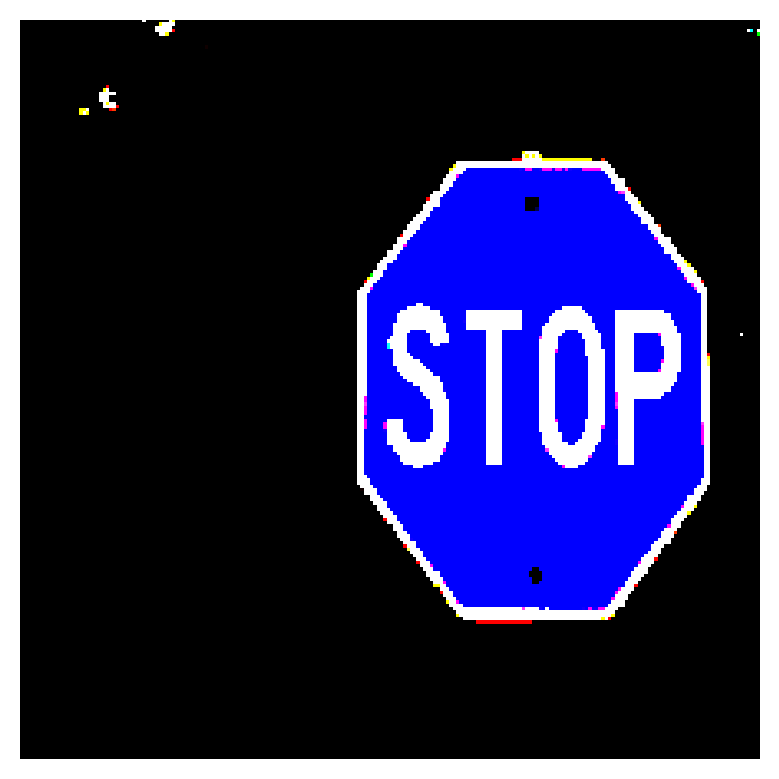

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")

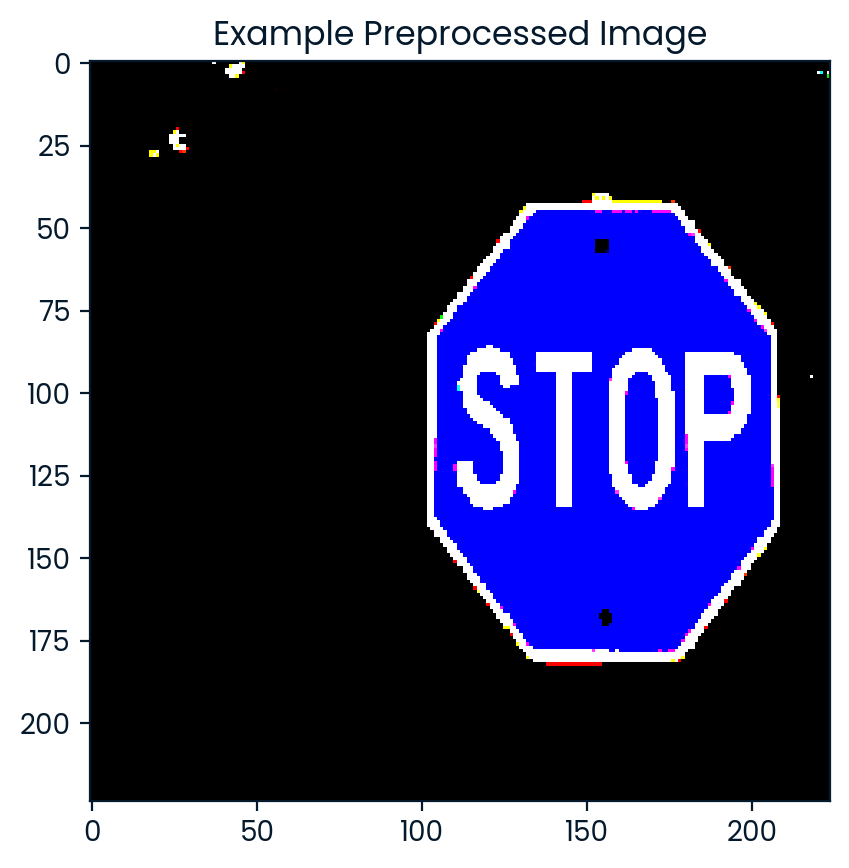

Epoch 1/20
1/1 [==============================] - 1s 528ms/step - loss: 2.7316 - accuracy: 0.4167
Epoch 2/20
1/1 [==============================] - 0s 115ms/step - loss: 117.7984 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 100ms/step - loss: 7.0835 - accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 93ms/step - loss: 2.3781 - accuracy: 0.8333
Epoch 5/20
1/1 [==============================] - 0s 112ms/step - loss: 2.7631 - accuracy: 0.8333
Epoch 6/20
1/1 [==============================] - 0s 113ms/step - loss: 1.6934 - accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 118ms/step - loss: 1.4629e-04 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 114ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 87ms/step - loss: 0.5571 - accuracy: 0.8333
Epoch 10/20
1/1 [==============================] - 0s 108ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 11/20
1/1

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Function to load data
def load_data():
    """
    Load preprocessed images and corresponding labels from file.
    """
    images, labels = np.load('batch.npy', allow_pickle=True).tolist()
    return images, labels

# Function to visualize an example image
def visualize_image(image, index=2):
    """
    Visualize one preprocessed image.
    """
    plt.imshow(image[index])
    plt.title("Example Preprocessed Image")
    plt.show()

# Function to build the CNN model
def build_model(input_size, num_classes, dropout_rate=0.2):
    """
    Build a sequential CNN model with three convolutional layers,
    average pooling layers, and dense layers for classification.
    """
    model = keras.Sequential([
        # Feature extractor
        layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 3)),
        layers.AveragePooling2D(2, 2),
        layers.Conv2D(32, kernel_size=3, activation='relu'),
        layers.AveragePooling2D(2, 2),
        layers.Conv2D(64, kernel_size=3, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.AveragePooling2D(2, 2),
        
        # Model adapter
        layers.Flatten(),
        layers.Dense(64, activation='relu'),

        # Classifier head
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax', name='classifier_head')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Function to train the model
def train_model(model, images, labels, epochs=20):
    """
    Train the model with the given images and labels.
    """
    history = model.fit(images, labels, epochs=epochs)
    return history

# Main script
if __name__ == "__main__":
    # Load data
    images, labels = load_data()

    # Hyperparameters
    input_size = images.shape[1]  # dimension of input image
    num_classes = labels['classifier_head'].shape[1]  # number of classes

    # Visualize an example image
    visualize_image(images)

    # Build the model
    model = build_model(input_size, num_classes)

    # Train the model
    history = train_model(model, images, labels['classifier_head'], epochs=20)

    # Extract final training accuracy and assign to `accuracy` object
    accuracy = history.history['accuracy'][-1]
    print(f"Final Training Accuracy: {accuracy:.4f}")